In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils.Dataset import load_logging_data

In [3]:
dataset = load_logging_data(data_root_path='data')

Loading data...:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
dataset.describe()

,Time 1 - default sample rate,BUMA 1_1 CH=4,BUMA 1_2 CH=5,BUMA 1_3 CH=6,BUMA 2_1 CH=7,BUMA 2_2 CH=8,BUMA 2_3 CH=9,BUMA 3_1 CH=10,BUMA 3_2 CH=11,BUMA 3_3 CH=12,...,angle_base_X CH=31,angle_base_Y CH=32,na_120 CH=150,MX840B_CH 2 CH=151,MX840B_CH 3 CH=152,MX840B_CH 4 CH=153,MX840B_CH 5 CH=154,MX840B_CH 6 CH=155,MX840B_CH 7 CH=156,MX840B_CH 8 CH=157\n
count,21372.000000,21372.000000,21372.000000,21372.000000,21372.000000,21372.000000,21372.000000,21372.000000,21372.000000,21372.000000,...,21372.000000,21372.000000,21372.000000,21372.0,21372.0,21372.0,21372.0,21372.0,21372.0,21372.0
mean,242.911275,3.763675,-18.954529,12.877451,5.268664,-10.753286,6.018901,-12.817853,5.988513,-10.930144,...,-94.213331,-93.572726,77.761076,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
std,208.608762,19.967076,19.360855,31.318070,16.802020,13.175866,25.120092,18.942027,6.857298,30.240754,...,9673.463096,9673.469297,30.194075,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,-64.000000,-100.660000,-93.480000,-115.800000,-45.040000,-73.040000,-120.180000,-15.890000,-111.050000,...,-1000000.000000,-1000000.000000,19.350000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
25%,89.069171,-12.530000,-33.270000,-4.937500,-1.728500,-21.450000,-9.536000,-19.692500,1.036000,-36.162500,...,-0.700000,-0.100000,64.100000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
50%,178.093342,1.397000,-22.470000,6.073000,4.037500,-10.640000,4.085000,-11.100000,6.057500,-12.805000,...,-0.700000,0.100000,77.000000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
75%,329.625016,16.452500,-8.280500,24.085000,14.362500,-1.113500,14.850000,-0.915825,9.019000,2.048000,...,-0.600000,0.200000,89.200000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
max,818.600039,68.500000,68.720000,174.760000,62.790000,38.990000,144.860000,72.270000,49.990000,142.590000,...,1.800000,1.400000,255.350000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0


In [5]:
angle_name_list = list(dataset.columns)[22:24] + list(dataset.columns)[26:28]

for angle_name in angle_name_list:
    dataset = dataset[dataset[angle_name] < 5]

for angle_name in angle_name_list:
    dataset = dataset[dataset[angle_name] > -5]

dataset.reset_index(drop=True, inplace=True)

In [6]:
pressure_name_list = list(dataset.columns)[18:20] + list(dataset.columns)[24:26]

for pressure_name in pressure_name_list:
    dataset = dataset[dataset[pressure_name] > 0]

dataset.reset_index(drop=True, inplace=True)

In [7]:
dataset = dataset[dataset['caloutput_drill_depth CH=26'] > 3]
dataset.reset_index(drop=True, inplace=True)

In [8]:
dataset = dataset[dataset['caloutput_rotate_velocity CH=25'] > 0]
dataset.reset_index(drop=True, inplace=True)

In [9]:
dataset.describe()

,Time 1 - default sample rate,BUMA 1_1 CH=4,BUMA 1_2 CH=5,BUMA 1_3 CH=6,BUMA 2_1 CH=7,BUMA 2_2 CH=8,BUMA 2_3 CH=9,BUMA 3_1 CH=10,BUMA 3_2 CH=11,BUMA 3_3 CH=12,...,angle_base_X CH=31,angle_base_Y CH=32,na_120 CH=150,MX840B_CH 2 CH=151,MX840B_CH 3 CH=152,MX840B_CH 4 CH=153,MX840B_CH 5 CH=154,MX840B_CH 6 CH=155,MX840B_CH 7 CH=156,MX840B_CH 8 CH=157\n
count,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,...,2678.000000,2678.000000,2678.000000,2678.0,2678.0,2678.0,2678.0,2678.0,2678.0,2678.0
mean,154.167207,21.271839,-12.650762,22.387007,7.436477,-8.133186,-0.397471,-4.047767,2.294208,-6.599154,...,-0.646191,-0.468447,91.415889,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
std,49.776902,14.572829,20.482135,39.988510,17.679099,10.569436,32.618496,22.642094,4.677531,28.498339,...,0.119856,0.125827,24.541846,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,61.173336,-28.030000,-81.170000,-64.800000,-84.430000,-39.830000,-71.050000,-111.480000,-15.460000,-73.450000,...,-1.300000,-0.800000,29.530000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
25%,114.376672,13.285000,-24.100000,-4.260250,1.520000,-19.070000,-22.287500,-20.620000,0.043432,-23.875000,...,-0.700000,-0.600000,72.930000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
50%,155.630007,19.985000,-11.375000,21.930000,6.559500,-2.982000,-13.295000,3.777000,1.949000,-12.935000,...,-0.600000,-0.500000,80.380000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
75%,191.783342,32.617500,-4.317000,29.317500,15.817500,-0.503600,23.290000,10.135000,3.816250,9.021250,...,-0.600000,-0.400000,109.550000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0
max,256.973346,68.500000,68.720000,155.620000,55.640000,38.990000,144.860000,49.780000,26.590000,142.590000,...,0.200000,0.000000,197.700000,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0


In [10]:
dataset['power'] = dataset['pressure_1_pressure_transmitter_1_drive1 CH=23'] * dataset['caloutput_rotate_velocity CH=25']
dataset['power'] = (dataset['power']-dataset['power'].min()) / (dataset['power'].max()-dataset['power'].min())
dataset['grad_depth'] = np.gradient(dataset['caloutput_drill_depth CH=26'])
dataset['sample'] =  np.arange(dataset.shape[0])

In [11]:
dataset.describe()

,Time 1 - default sample rate,BUMA 1_1 CH=4,BUMA 1_2 CH=5,BUMA 1_3 CH=6,BUMA 2_1 CH=7,BUMA 2_2 CH=8,BUMA 2_3 CH=9,BUMA 3_1 CH=10,BUMA 3_2 CH=11,BUMA 3_3 CH=12,...,MX840B_CH 2 CH=151,MX840B_CH 3 CH=152,MX840B_CH 4 CH=153,MX840B_CH 5 CH=154,MX840B_CH 6 CH=155,MX840B_CH 7 CH=156,MX840B_CH 8 CH=157\n,power,grad_depth,sample
count,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,...,2678.0,2678.0,2678.0,2678.0,2678.0,2678.0,2678.0,2678.000000,2678.000000,2678.000000
mean,154.167207,21.271839,-12.650762,22.387007,7.436477,-8.133186,-0.397471,-4.047767,2.294208,-6.599154,...,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.313943,0.000000,1338.500000
std,49.776902,14.572829,20.482135,39.988510,17.679099,10.569436,32.618496,22.642094,4.677531,28.498339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233412,0.100429,773.216335
min,61.173336,-28.030000,-81.170000,-64.800000,-84.430000,-39.830000,-71.050000,-111.480000,-15.460000,-73.450000,...,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.000000,-0.500000,0.000000
25%,114.376672,13.285000,-24.100000,-4.260250,1.520000,-19.070000,-22.287500,-20.620000,0.043432,-23.875000,...,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.107696,0.000000,669.250000
50%,155.630007,19.985000,-11.375000,21.930000,6.559500,-2.982000,-13.295000,3.777000,1.949000,-12.935000,...,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.270716,0.000000,1338.500000
75%,191.783342,32.617500,-4.317000,29.317500,15.817500,-0.503600,23.290000,10.135000,3.816250,9.021250,...,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,0.461988,0.000000,2007.750000
max,256.973346,68.500000,68.720000,155.620000,55.640000,38.990000,144.860000,49.780000,26.590000,142.590000,...,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,-1000000.0,1.000000,0.500000,2677.000000


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678 entries, 0 to 2677
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Time  1 - default sample rate                   2678 non-null   float64
 1   BUMA 1_1 CH=4                                   2678 non-null   float64
 2   BUMA 1_2 CH=5                                   2678 non-null   float64
 3   BUMA 1_3 CH=6                                   2678 non-null   float64
 4   BUMA 2_1 CH=7                                   2678 non-null   float64
 5   BUMA 2_2 CH=8                                   2678 non-null   float64
 6   BUMA 2_3 CH=9                                   2678 non-null   float64
 7   BUMA 3_1 CH=10                                  2678 non-null   float64
 8   BUMA 3_2 CH=11                                  2678 non-null   float64
 9   BUMA 3_3 CH=12                           

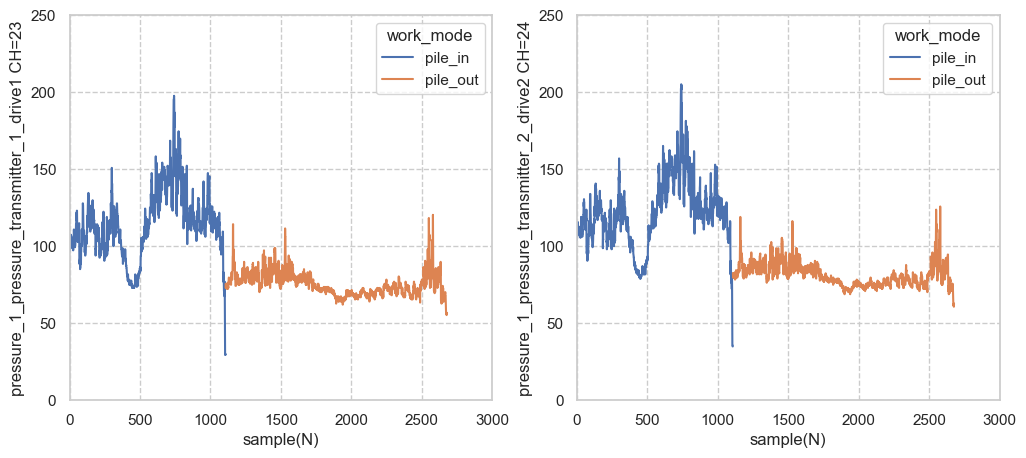

In [13]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

for i, pressure_name in enumerate(pressure_name_list[0:2]):
    sns.lineplot(data=dataset, x='sample', y=pressure_name, ax=axis[i], hue='work_mode')
    
    axis[i].set_xlim(0, 3000)
    axis[i].set_xlabel('sample(N)')
    axis[i].set_ylim(0, 250)
    axis[i].set_ylabel(pressure_name)

In [14]:
pressure_pile_in = dataset[dataset['work_mode'] == 'pile_in'][pressure_name_list]
pressure_pile_in.describe()

,pressure_1_pressure_transmitter_1_drive1 CH=23,pressure_1_pressure_transmitter_2_drive2 CH=24,pressure_2_pressure_transmitter_6_cyl_1 CH=29,pressure_3_pressure_transmitter_7_cyl_2 CH=30
count,1108.000000,1108.000000,1108.000000,1108.000000
mean,114.255839,121.282319,34.344449,18.274305
std,22.015816,22.163360,1.569282,1.376906
min,29.530000,34.950000,26.800000,10.530000
25%,101.232500,108.180000,33.580000,17.300000
50%,114.300000,120.400000,34.280000,18.680000
75%,125.830000,133.280000,35.630000,19.350000
max,197.700000,205.180000,41.050000,22.050000


In [15]:
pressure_pile_out = dataset[dataset['work_mode'] == 'pile_out'][pressure_name_list]
pressure_pile_out.describe()

,pressure_1_pressure_transmitter_1_drive1 CH=23,pressure_1_pressure_transmitter_2_drive2 CH=24,pressure_2_pressure_transmitter_6_cyl_1 CH=29,pressure_3_pressure_transmitter_7_cyl_2 CH=30
count,1570.000000,1570.000000,1570.000000,1570.000000
mean,75.296994,81.257382,34.615803,18.556707
std,7.568923,7.565699,1.280241,1.122343
min,55.300000,60.730000,30.200000,15.280000
25%,70.200000,75.630000,33.580000,18.000000
50%,73.600000,79.700000,34.950000,18.680000
75%,79.532500,85.130000,35.630000,19.350000
max,120.400000,125.830000,39.700000,22.730000


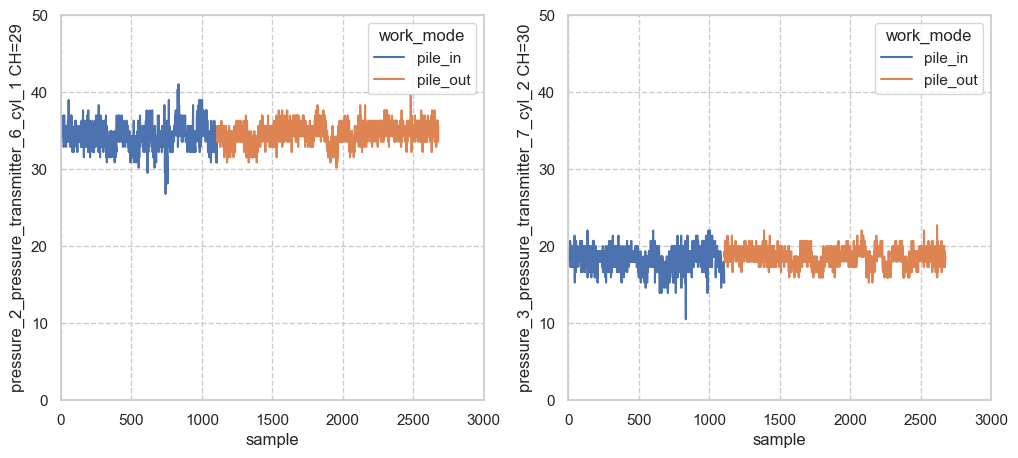

In [16]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

for i, pressure_name in enumerate(pressure_name_list[2:4]):
    sns.lineplot(data=dataset, x='sample', y=pressure_name, ax=axis[i], hue='work_mode')
    
    axis[i].set_xlim(0, 3000)
    axis[i].set_xlabel('sample')
    axis[i].set_ylim(0, 50)
    axis[i].set_ylabel(pressure_name)

In [17]:
angle_pile_in = dataset[dataset['work_mode'] == 'pile_in'][angle_name_list]
angle_pile_in.describe()

,angle_Mast_X CH=27,angle_Mast_Y CH=28,angle_base_X CH=31,angle_base_Y CH=32
count,1108.000000,1108.000000,1108.000000,1108.000000
mean,0.287184,-0.959206,-0.654964,-0.372653
std,0.325793,0.255625,0.166918,0.131290
min,-1.200000,-2.100000,-1.300000,-0.800000
25%,0.100000,-1.100000,-0.700000,-0.400000
50%,0.300000,-0.900000,-0.600000,-0.400000
75%,0.500000,-0.800000,-0.600000,-0.300000
max,1.400000,0.000000,0.200000,0.000000


In [18]:
angle_pile_out = dataset[dataset['work_mode'] == 'pile_out'][angle_name_list]
angle_pile_out.describe()

,angle_Mast_X CH=27,angle_Mast_Y CH=28,angle_base_X CH=31,angle_base_Y CH=32
count,1570.000000,1570.000000,1570.000000,1570.000000
mean,0.253248,-0.388854,-0.640000,-0.536051
std,0.167972,0.207069,0.068991,0.061630
min,-0.800000,-2.500000,-1.100000,-0.800000
25%,0.200000,-0.400000,-0.700000,-0.600000
50%,0.200000,-0.400000,-0.600000,-0.500000
75%,0.300000,-0.300000,-0.600000,-0.500000
max,1.200000,0.300000,-0.400000,-0.300000


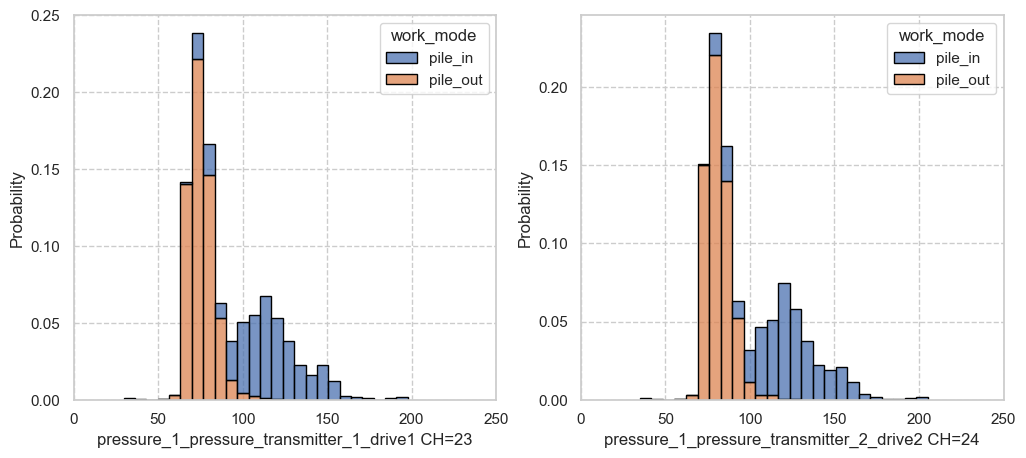

In [19]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

for i, pressure_name in enumerate(pressure_name_list[0:2]):
    sns.histplot(dataset, x=pressure_name, stat='probability', hue='work_mode', multiple='stack', bins=25 ,ax=axis[i], edgecolor='black')
    axis[i].set_xlim(0, 250)
    axis[i].set_xlabel(pressure_name)

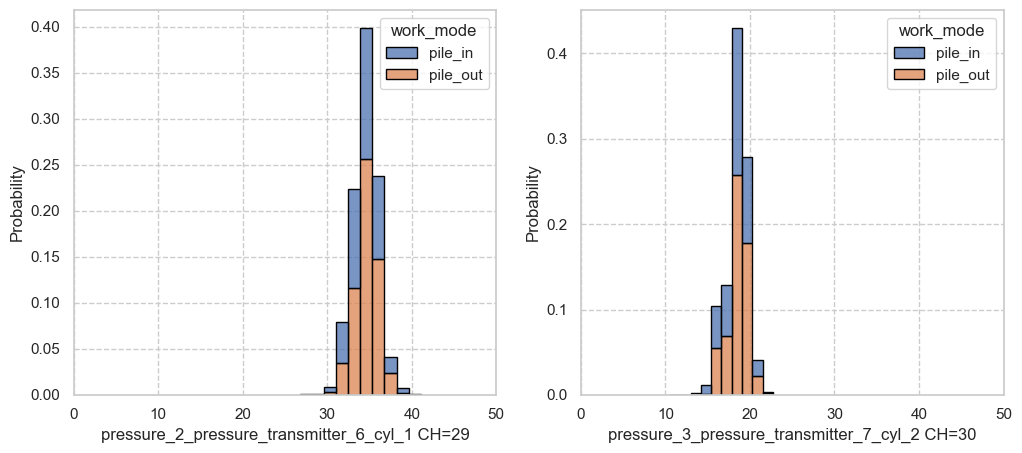

In [20]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

for i, pressure_name in enumerate(pressure_name_list[2:4]):
    sns.histplot(dataset, x=pressure_name, stat='probability', hue='work_mode', multiple='stack', bins=10 ,ax=axis[i], edgecolor='black')
    axis[i].set_xlim(0, 50)
    axis[i].set_xlabel(pressure_name)

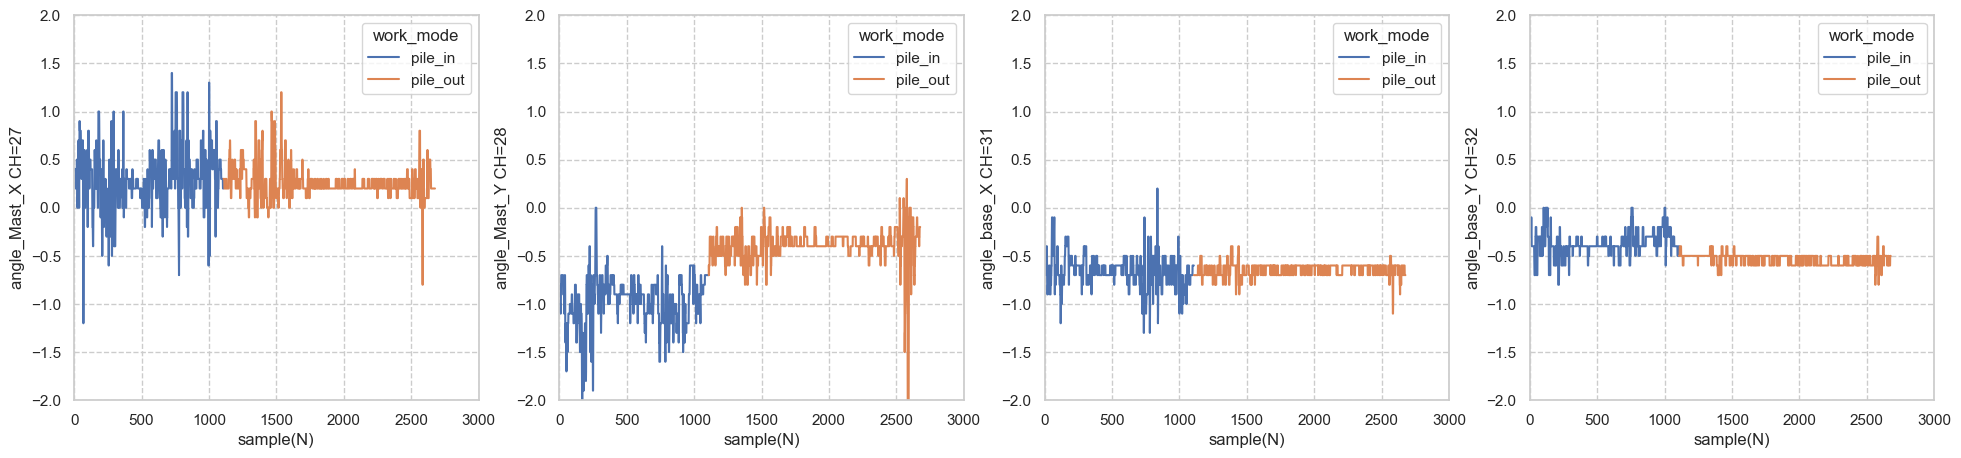

In [21]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=4)
fig.set_size_inches(24, 5)

for i, angle_name in enumerate(angle_name_list):
    sns.lineplot(data=dataset, x='sample', y=angle_name, ax=axis[i], hue='work_mode')
    
    axis[i].set_xlim(0, 3000)
    axis[i].set_xlabel('sample(N)')
    axis[i].set_ylim(-2, 2)
    axis[i].set_ylabel(angle_name)

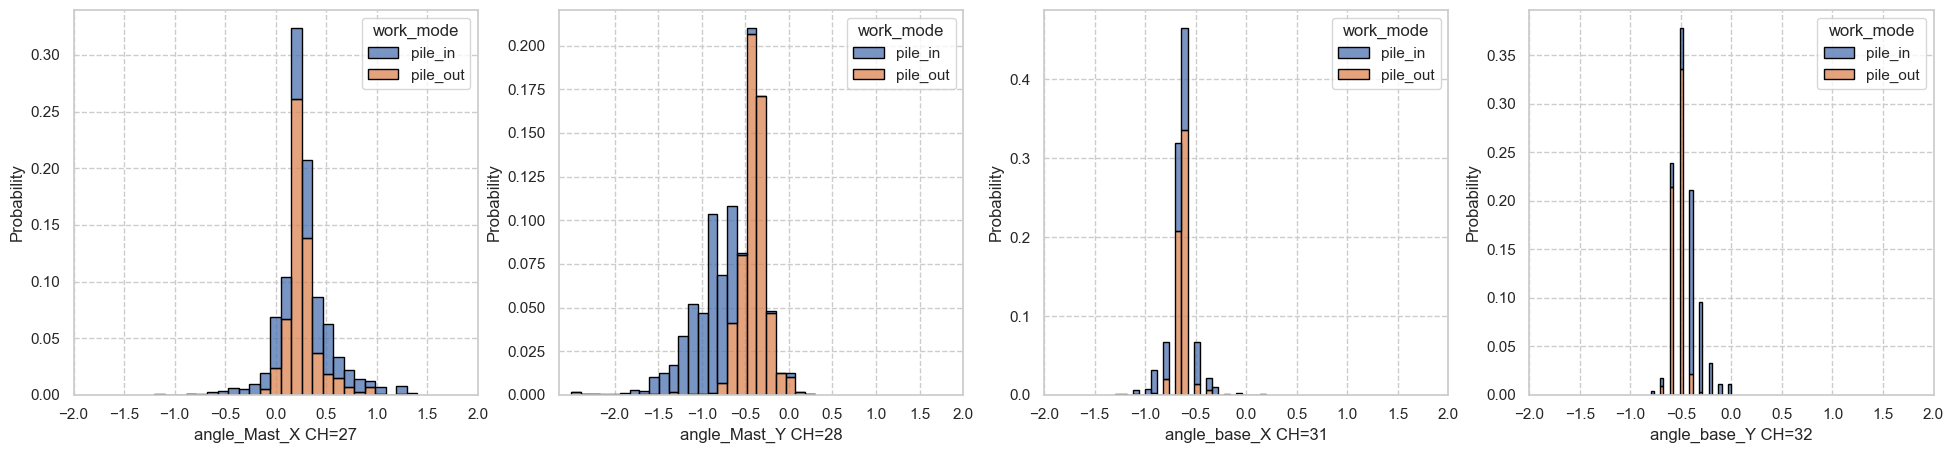

In [22]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=4)
fig.set_size_inches(24, 5)

for i, angle_name in enumerate(angle_name_list):
    sns.histplot(dataset, x=angle_name, stat='probability', hue='work_mode', multiple='stack', bins=25, ax=axis[i], edgecolor='black')
    axis[i].set_xticks(np.arange(-2, 2.1, 0.5))
    axis[i].set_xlabel(angle_name)

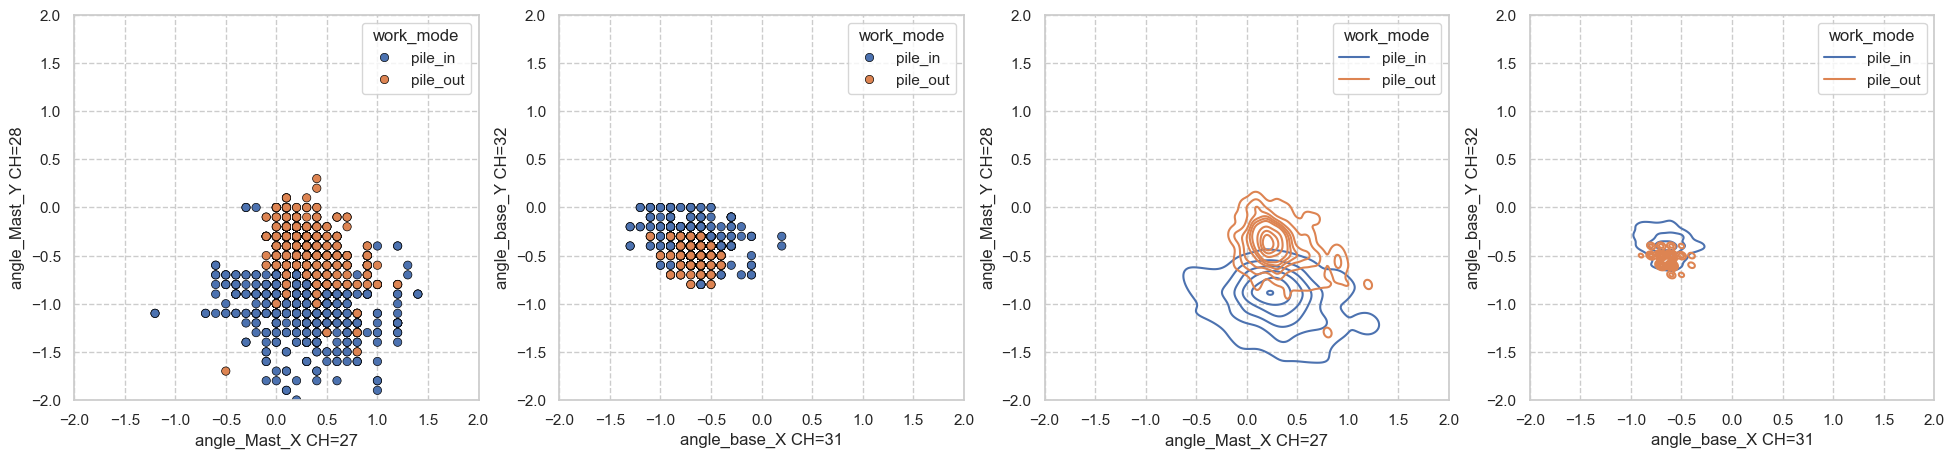

In [23]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=4)
fig.set_size_inches(24, 5)

sns.scatterplot(data=dataset, x=angle_name_list[0], y=angle_name_list[1], hue='work_mode', edgecolor='black', ax=axis[0])
sns.scatterplot(data=dataset, x=angle_name_list[2], y=angle_name_list[3], hue='work_mode', edgecolor='black', ax=axis[1])

sns.kdeplot(data=dataset, x=angle_name_list[0], y=angle_name_list[1], hue='work_mode', ax=axis[2])
sns.kdeplot(data=dataset, x=angle_name_list[2], y=angle_name_list[3], hue='work_mode', ax=axis[3])

for i in range(4):
    axis[i].set_xticks(np.arange(-2, 2.1, 0.5))
    axis[i].set_ylim(-2, 2)

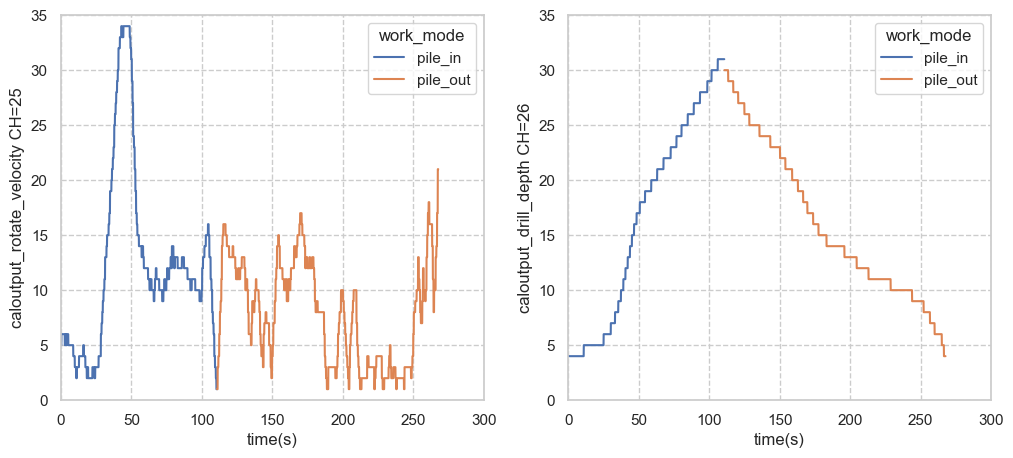

In [24]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.lineplot(data=dataset, x=dataset['sample']/10, y='caloutput_rotate_velocity CH=25', hue='work_mode', ax=axis[0])
sns.lineplot(data=dataset, x=dataset['sample']/10, y='caloutput_drill_depth CH=26', hue='work_mode', ax=axis[1])

for i in range(2):
    axis[i].set_xlim(0, 300)
    axis[i].set_xlabel('time(s)')
    axis[i].set_ylim(0, 35)


In [27]:
vel_pile_in = dataset[dataset['work_mode'] == 'pile_out']['caloutput_rotate_velocity CH=25']
vel_pile_in.describe()

count    1570.000000
mean        7.868153
std         4.643691
min         1.000000
25%         3.000000
50%         8.000000
75%        12.000000
max        21.000000
Name: caloutput_rotate_velocity CH=25, dtype: float64

Text(0.5, 0, 'Gradient Depth')

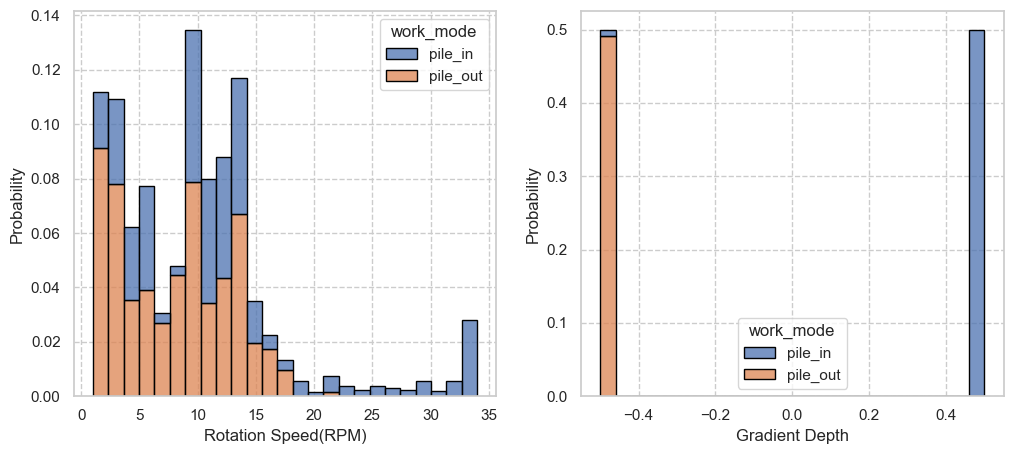

In [33]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.histplot(data=dataset, x='caloutput_rotate_velocity CH=25', stat='probability', hue='work_mode', multiple='stack', bins=25, edgecolor='black', ax=axis[0])
sns.histplot(data=dataset[dataset['grad_depth']!=0], x='grad_depth', stat='probability', hue='work_mode', multiple='stack', bins=25, edgecolor='black', ax=axis[1])

axis[0].set_xlabel('Rotation Speed(RPM)')
axis[1].set_xlabel('Gradient Depth')
#axis[1].set_xlim(-0.1, 0.1)

In [38]:
grad_depth_pile_in = dataset[dataset['grad_depth'] != 0]
grad_depth_pile_in = grad_depth_pile_in[grad_depth_pile_in['work_mode'] == 'pile_in']['grad_depth']
grad_depth_pile_in.describe()

count    55.000000
mean      0.481818
std       0.134840
min      -0.500000
25%       0.500000
50%       0.500000
75%       0.500000
max       0.500000
Name: grad_depth, dtype: float64

(0.0, 1.0)

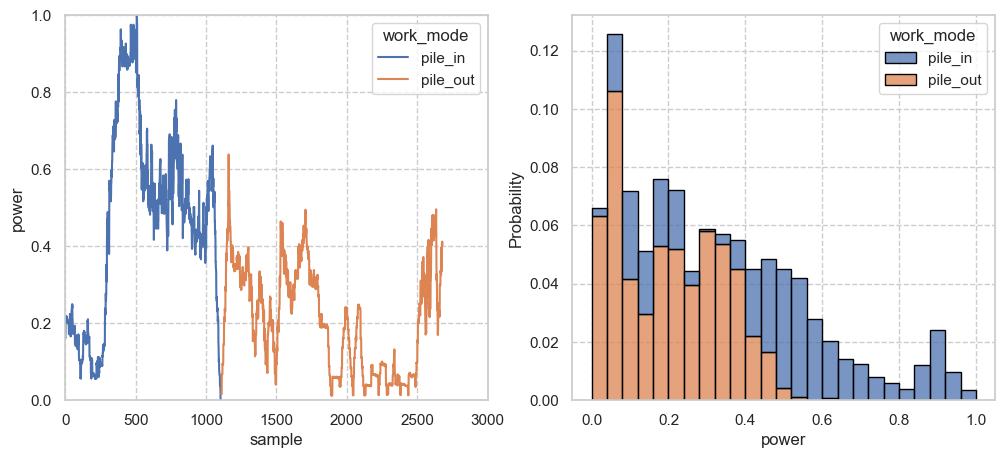

In [98]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

sns.lineplot(data=dataset, x='sample', y='power', hue='work_mode', ax=axis[0])
sns.histplot(data=dataset, x='power', stat='probability', hue='work_mode', multiple='stack', bins=25, ax=axis[1], edgecolor='black')

axis[0].set_xlim(0, 3000)
axis[0].set_ylim(0, 1)

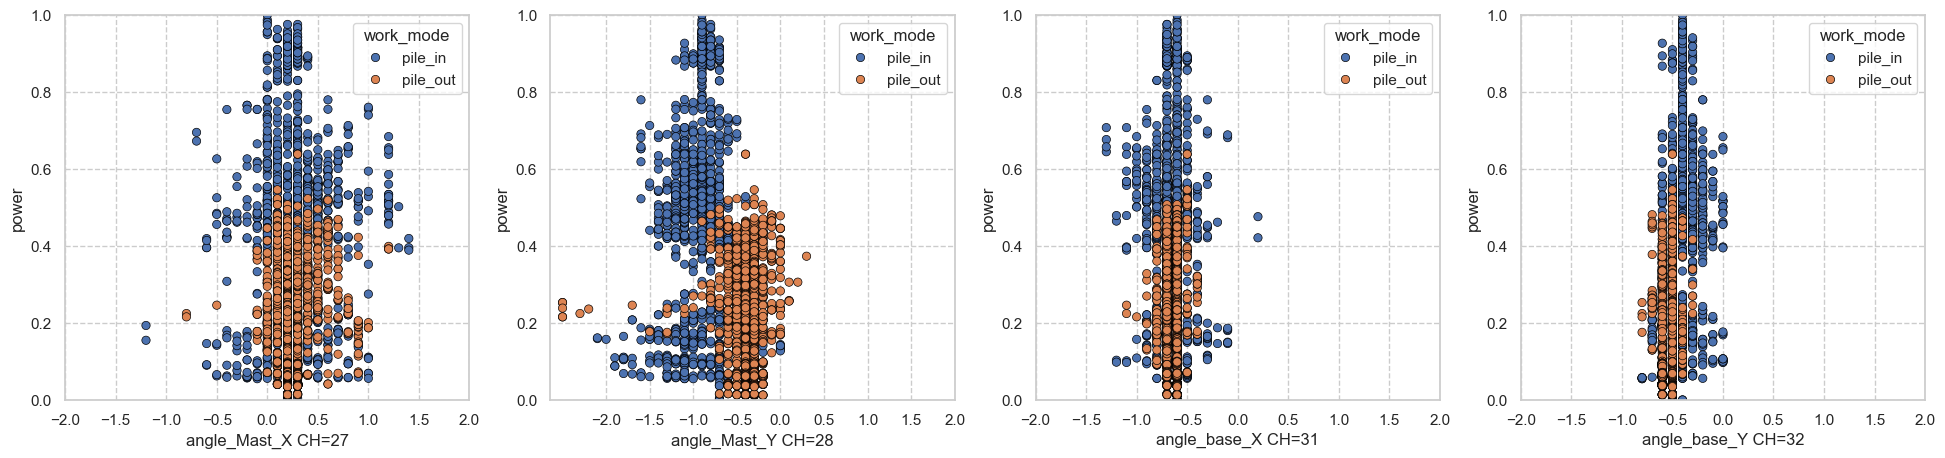

In [116]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=4)
fig.set_size_inches(24, 5)

for i, angle_name in enumerate(angle_name_list):
    sns.scatterplot(data=dataset, x=angle_name, y='power', ax=axis[i], edgecolor='black', hue='work_mode')
    
    axis[i].set_xticks(np.arange(-2, 2.1, 0.5))
    axis[i].set_xlabel(angle_name)
    axis[i].set_ylim(0, 1)

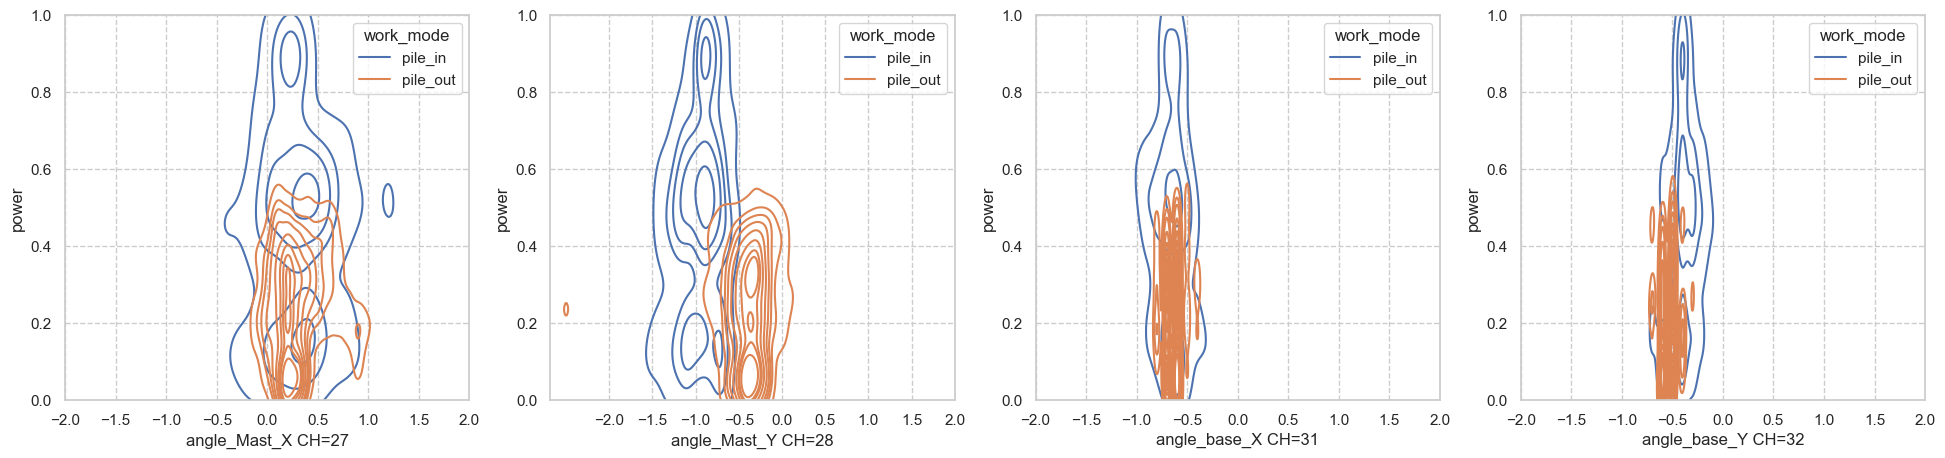

In [112]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

fig, axis = plt.subplots(ncols=4)
fig.set_size_inches(24, 5)

for i, angle_name in enumerate(angle_name_list):
    sns.kdeplot(data=dataset, x=angle_name, y='power', ax=axis[i], hue='work_mode')
    
    axis[i].set_xticks(np.arange(-2, 2.1, 0.5))
    axis[i].set_xlabel(angle_name)
    axis[i].set_ylim(0, 1)

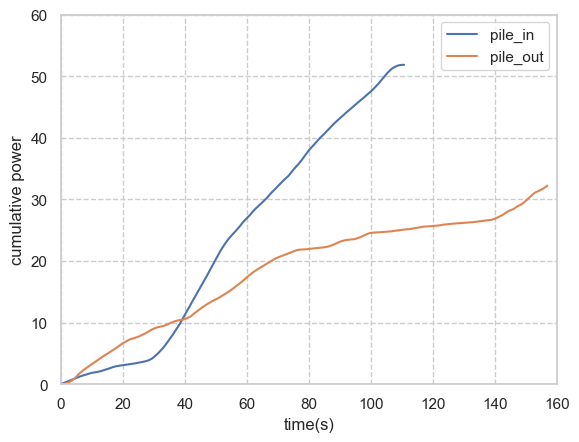

In [159]:
sns.set_theme(font_scale=1)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

pile_in_cum_power = np.cumsum(dataset[dataset['work_mode']=='pile_in']['power'])/10
pile_out_cum_power = np.cumsum(dataset[dataset['work_mode']=='pile_out']['power'])/10

sns.lineplot(x=np.arange(len(pile_in_cum_power))/10, y=pile_in_cum_power, label='pile_in')
sns.lineplot(x=np.arange(len(pile_out_cum_power))/10, y=pile_out_cum_power, label='pile_out')

plt.xlim(0, 160)
plt.xlabel('time(s)')
plt.ylim(0, 60)
#plt.yticks(np.arange(0, 600, 50))
plt.ylabel('cumulative power')

plt.show()

In [164]:
print(pile_in_cum_power.max(), pile_out_cum_power.max())

51.84090504287841 32.23304499313437


In [146]:
a = np.cumsum(dataset['power'][0:100])

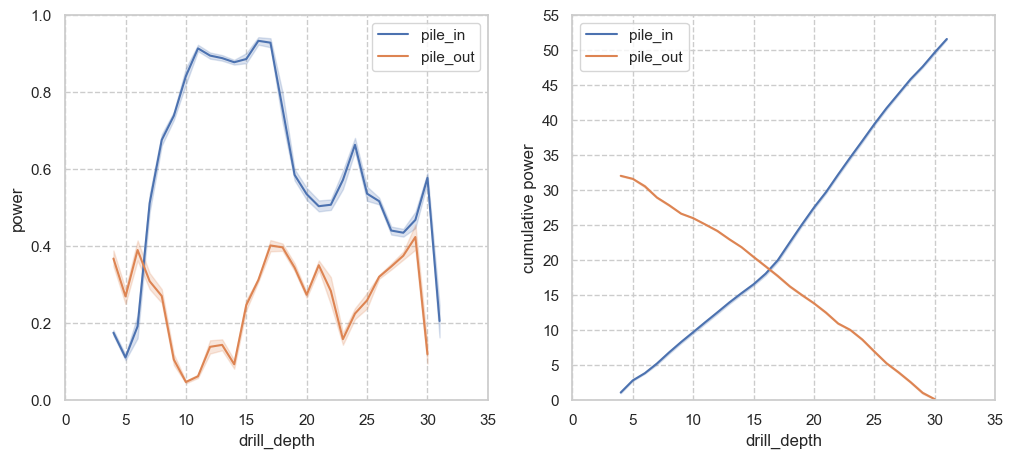

In [183]:
fig, axis = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

pile_in_power = dataset[dataset['work_mode']=='pile_in']['power']
pile_out_power = dataset[dataset['work_mode']=='pile_out']['power']

sns.lineplot(x=dataset[dataset['work_mode']=='pile_in']['caloutput_drill_depth CH=26'], y=pile_in_power, label='pile_in', ax=axis[0])
sns.lineplot(x=dataset[dataset['work_mode']=='pile_out']['caloutput_drill_depth CH=26'], y=pile_out_power, label='pile_out', ax=axis[0])

sns.lineplot(x=dataset[dataset['work_mode']=='pile_in']['caloutput_drill_depth CH=26'], y=pile_in_cum_power, label='pile_in', ax=axis[1])
sns.lineplot(x=dataset[dataset['work_mode']=='pile_out']['caloutput_drill_depth CH=26'], y=pile_out_cum_power, label='pile_out', ax=axis[1])

axis[0].set_xlim(0, 35)
axis[0].set_xlabel('drill_depth')
axis[0].set_ylim(0, 1)

axis[1].set_xlim(0, 35)
axis[1].set_xlabel('drill_depth')

axis[1].set_ylim(0, 55)
axis[1].set_yticks(np.arange(0, 60, 5))
axis[1].set_ylabel('cumulative power')

plt.show()

In [187]:
pile_in_bool = dataset['work_mode']=='pile_in'
pile_out_bool = dataset['work_mode']=='pile_out'

print(pile_in_cum_power.max()/(dataset[pile_in_bool]['caloutput_drill_depth CH=26'].max()-dataset[pile_in_bool]['caloutput_drill_depth CH=26'].min()))
print(pile_out_cum_power.max()/(dataset[pile_out_bool]['caloutput_drill_depth CH=26'].max()-dataset[pile_out_bool]['caloutput_drill_depth CH=26'].min()))


1.9200335201066079
1.2397324997359374


In [188]:
print(dataset[dataset['work_mode']=='pile_in']['power'].mean(), dataset[dataset['work_mode']=='pile_in']['power'].std())
print(dataset[dataset['work_mode']=='pile_out']['power'].mean(), dataset[dataset['work_mode']=='pile_out']['power'].std())

0.4678782043581091 0.2563336694265403
0.20530601906455082 0.1343582337008541


<Axes: >

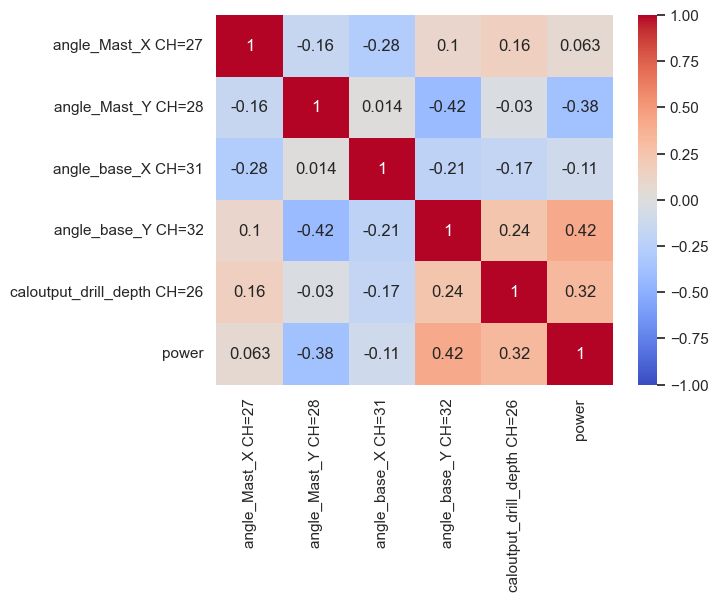

In [189]:
confusion_mat = dataset[angle_name_list + ['caloutput_drill_depth CH=26', 'power']].corr()
sns.heatmap(confusion_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)